# 데이터 전처리 - 피처 엔지니어링 - 모델훈련 - 결과 예측

In [100]:
# 데이터 위치
# https://drive.google.com/drive/folders/1bnxQ55Y0IeuS0wHXyPd_r7Q6-8R5qBUN?usp=sharing

import pandas as pd
url = 'C:/python_src2/data/San-Francisco-Crime.csv'
df = pd.read_csv(url)
df.shape

(878049, 9)

In [101]:
df.describe(include='object')

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
count,878049,878049,878049,878049,878049,878049,878049
unique,389257,39,879,7,10,17,23228
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST
freq,185,174900,60022,133734,157182,526790,26533


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [103]:
# 불필요한 컬럼제거
train = df.drop(columns=['Descript','Resolution','Address'])
train.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y
0,2015-05-13 23:53:00,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541


In [104]:
# 범주형 데이터 변환
# 종속변수 Category 인코딩
from sklearn.preprocessing import LabelEncoder
train.Category =  LabelEncoder().fit_transform(train.Category)
train.head()

,Dates,Category,DayOfWeek,PdDistrict,X,Y
0,2015-05-13 23:53:00,37,Wednesday,NORTHERN,-122.425892,37.774599
1,2015-05-13 23:53:00,21,Wednesday,NORTHERN,-122.425892,37.774599
2,2015-05-13 23:33:00,21,Wednesday,NORTHERN,-122.424363,37.800414
3,2015-05-13 23:30:00,16,Wednesday,NORTHERN,-122.426995,37.800873
4,2015-05-13 23:30:00,16,Wednesday,PARK,-122.438738,37.771541


In [105]:
# 경찰서 관할구역 PdDistrict - oneHot
district_dummies =  pd.get_dummies(train.PdDistrict,prefix='Distirict').astype(int)
# 합치기
train = pd.concat([train,district_dummies], axis=1)
train = train.drop(columns=['PdDistrict'])
train.head()

,Dates,Category,DayOfWeek,X,Y,Distirict_BAYVIEW,Distirict_CENTRAL,Distirict_INGLESIDE,Distirict_MISSION,Distirict_NORTHERN,Distirict_PARK,Distirict_RICHMOND,Distirict_SOUTHERN,Distirict_TARAVAL,Distirict_TENDERLOIN
0,2015-05-13 23:53:00,37,Wednesday,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0
1,2015-05-13 23:53:00,21,Wednesday,-122.425892,37.774599,0,0,0,0,1,0,0,0,0,0
2,2015-05-13 23:33:00,21,Wednesday,-122.424363,37.800414,0,0,0,0,1,0,0,0,0,0
3,2015-05-13 23:30:00,16,Wednesday,-122.426995,37.800873,0,0,0,0,1,0,0,0,0,0
4,2015-05-13 23:30:00,16,Wednesday,-122.438738,37.771541,0,0,0,0,0,1,0,0,0,0


In [106]:
train['Year'] =  pd.to_datetime(train.Dates).dt.year
train['Month'] =  pd.to_datetime(train.Dates).dt.month
train['Day'] =  pd.to_datetime(train.Dates).dt.day
train['Hour'] =  pd.to_datetime(train.Dates).dt.hour
train['Minute'] =  pd.to_datetime(train.Dates).dt.minute

train = train.drop(columns=['Dates'])

# one hot
dayofweek_onehot = pd.get_dummies(train.DayOfWeek, prefix='Day').astype(int)
train = pd.concat([ train, dayofweek_onehot], axis=1)
train = train.drop(columns=['DayOfWeek'])
train.head()

,Category,X,Y,Distirict_BAYVIEW,Distirict_CENTRAL,Distirict_INGLESIDE,Distirict_MISSION,Distirict_NORTHERN,Distirict_PARK,Distirict_RICHMOND,...,Day,Hour,Minute,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,37,-122.425892,37.774599,0,0,0,0,1,0,0,...,13,23,53,0,0,0,0,0,0,1
1,21,-122.425892,37.774599,0,0,0,0,1,0,0,...,13,23,53,0,0,0,0,0,0,1
2,21,-122.424363,37.800414,0,0,0,0,1,0,0,...,13,23,33,0,0,0,0,0,0,1
3,16,-122.426995,37.800873,0,0,0,0,1,0,0,...,13,23,30,0,0,0,0,0,0,1
4,16,-122.438738,37.771541,0,0,0,0,0,1,0,...,13,23,30,0,0,0,0,0,0,1


In [107]:
from sklearn.model_selection import train_test_split
# 훈련 데이터 분리
X = train.drop(columns=['Category']).to_numpy()
y = train.Category

x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2, random_state=42)
x_train.shape ,  y_train.shape

((702439, 24), (702439,))

In [108]:
# 모델 생성 및 학습

In [109]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()  # 과적합 가능성이 크다
# 모델 학습
model.fit(x_train,y_train)
# 평가 정확도
model.score(x_train,y_train),  model.score(x_test,y_test)

KeyboardInterrupt: 

In [ ]:
# 하이퍼 파라메터 튜닝
from sklearn.model_selection import GridSearchCV
param_grid = {
   'max_depth':[3,5,7,10,15],
   'min_samples_split' : [2,10,20],  # 노드를 분할하기위한 최소 샘플수(복잡도 제어)
   'min_samples_leaf' : [1,5,10], # 리프노드를 나누기 위한 최소 샘플수
   'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV( 
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=5,
    return_train_score=True,
    n_jobs=-1  # 모든 cpu코어 사용
 )
grid_search.fit(x_train,y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 10, ...]}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,criterion,'gini'


In [ ]:
# 최적의 하이퍼 파라메터
grid_search.best_params_, grid_search.best_score_

({'criterion': 'gini',
  'max_depth': 15,
  'min_samples_leaf': 1,
  'min_samples_split': 20},
 np.float64(0.27907761329165426))

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by = 'rank_test_score')
results = results[[
    'params',
    'mean_train_score',
    'mean_test_score',
    'rank_test_score'
]]
print('GridSearchCV 결과')
results.head()

GridSearchCV 결과


,params,mean_train_score,mean_test_score,rank_test_score
38,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.332747,0.279078,1
41,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.331615,0.279002,2
37,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.339185,0.278427,3
42,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.329468,0.278421,4
44,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.329467,0.278417,5


In [ ]:
from sklearn.metrics import classification_report
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print( classification_report(y_test,y_pred)  )

In [ ]:
# 가중치 조절
# 클래스 불균형이 심한경우. 소수의 클래스에 가중치를 더 부여
# 사이킷런 계열은 대부분 class_weight 존재...
best_params = grid_search.best_params_
best_params['class_weight'] = 'balanced'
balanced_tree = DecisionTreeClassifier(**best_params)
balanced_tree.fit(x_train,y_train)
y_pred = balanced_tree.predict(x_test)
print( classification_report(y_test,y_pred)  )

In [ ]:
# 데이터 증강
# %pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote =  SMOTE(random_state=42,k_neighbors=4)
# 훈련데이터에 대해서만 적용
x_train_over, y_train_over =  smote.fit_resample(x_train,y_train)
y_train_over.value_counts()

In [ ]:
# best_params 재 사용
over_tree = DecisionTreeClassifier(**best_params)
over_tree.fit(x_train_over, y_train_over)
over_tree.score(x_test,y_test)

0.18771710039291611

Dates         0.0
Category      0.0
Descript      0.0
DayOfWeek     0.0
PdDistrict    0.0
Resolution    0.0
Address       0.0
X             0.0
Y             0.0
dtype: float64


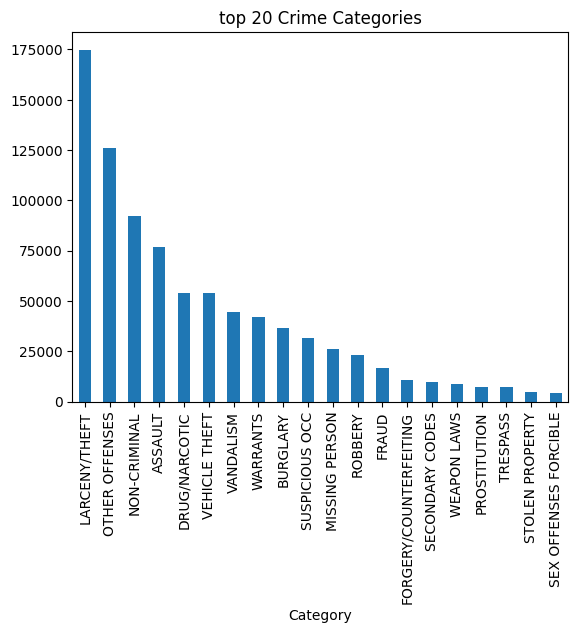

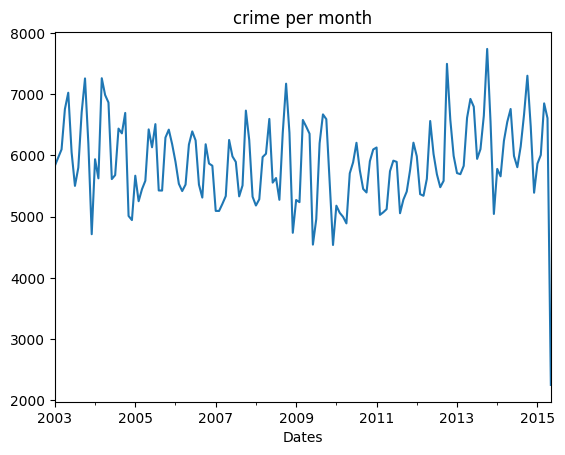

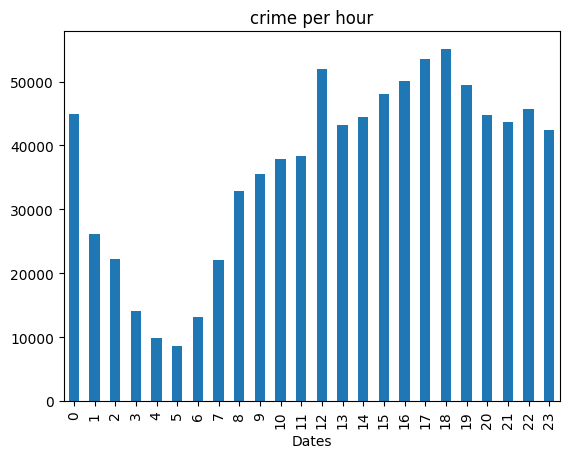

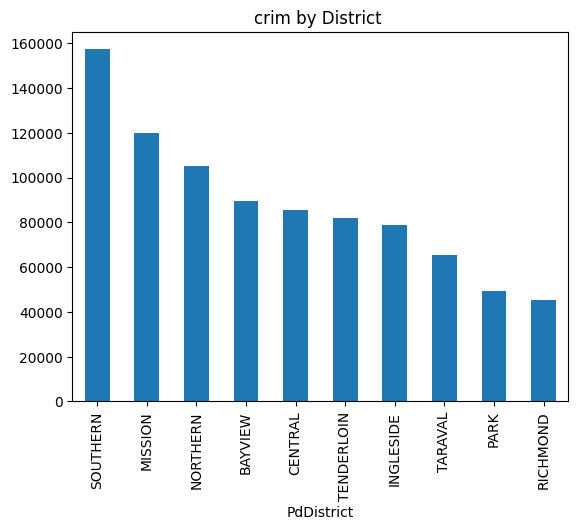

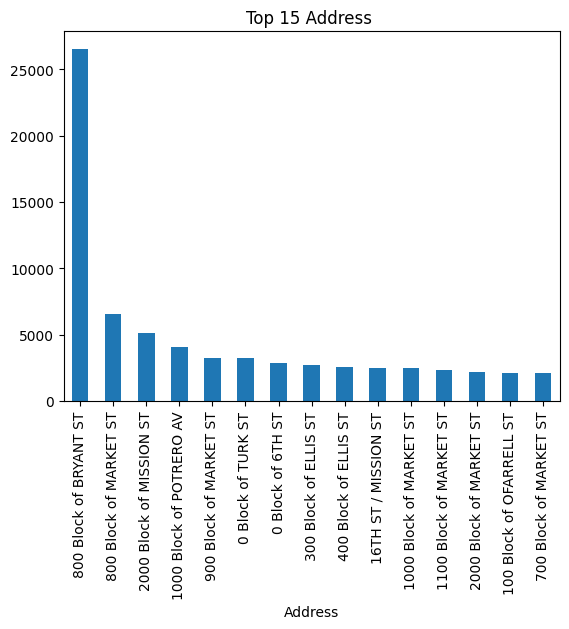

In [110]:
# EDA
import matplotlib.pyplot as plt
import pandas as pd
url = 'C:/python_src2/data/San-Francisco-Crime.csv'
df = pd.read_csv(url)
print(df.isna().mean().sort_values(ascending=False))

# top categories
df.Category.value_counts().head(20).plot(kind='bar')
plt.title('top 20 Crime Categories')
plt.show()

# 월별 트랜드
dt = pd.to_datetime(df.Dates)
monthly = df.groupby([dt.dt.to_period('M')]).size().rename('count').to_timestamp()
monthly.plot()
plt.title('crime per month')
plt.show()

# 시간대
dt.dt.hour.value_counts().sort_index().plot(kind='bar')
plt.title('crime per hour')
plt.show()

# Distict counts
df.PdDistrict.value_counts().plot(kind='bar')
plt.title('crim by District ')
plt.show()

# top address
df.Address.value_counts().head(15).plot(kind='bar')
plt.title('Top 15 Address ')
plt.show()

In [111]:
# Feature Engineering
import numpy as np
out = df.copy()
dt = pd.to_datetime(out.Dates)
out['Year'] = dt.dt.year.astype(np.int16)
out['Month'] = dt.dt.month.astype(np.int8)
out['Day'] = dt.dt.day.astype(np.int8)
out['Hour'] = dt.dt.hour.astype(np.int8)
out['Minute'] = dt.dt.minute.astype(np.int8)
out['isWeekend'] = (dt.dt.dayofweek >=5).astype(np.int8)
# 시간정보 시계처럼 2차원 원위에 표현 -->
# 1. 데이터를 각도로 변환 2*np.pi*시간 / 24.0  0~23시를 360도 원의 각도로 변환  6시 90도 12시 180도
# 2. 좌표계산 (x y)
# cosign  sigin 

out['sign_hour'] = np.sin(2*np.pi*out.Hour/24.0).astype(np.float32)
out['cos_hour'] = np.cos(2*np.pi*out.Hour/24.0).astype(np.float32)
mask = {
    'Monday':0,'Tuesday':1,'Wednesday':2,'Thursday':3,'Friday':4,'Saturday':5,'Sunday':6
}
out['dow_idx'] = out.DayOfWeek.map(mask).astype(np.int8)
out['sin_dow'] = np.sin(2*np.pi*out.dow_idx/7.0).astype(np.float32)
out['cos_dow'] = np.cos(2*np.pi*out.dow_idx/7.0).astype(np.float32)

# address
out['HasBlock'] = out.Address.str.contains('Block', case=False,regex=False).astype(np.int8)
new_center_x = -122.391846
new_center_y = 37.778125
# 지구둘레 40,000(지구둘레) / 360  111.1KM   1도당 111.0
dx = (out.X - new_center_x) * (111.0*np.cos(np.deg2rad(new_center_y)))
dy = (out.Y - new_center_y) * 111.0
# 거리
out['dist_km_new_center'] = np.sqrt(dx*dx +dy*dy).astype(np.float32)

out['X_round2'] = out.X.round(2).astype(np.float32)
out['y_round2'] = out.Y.round(2).astype(np.float32)

In [150]:
le = LabelEncoder()
y = le.fit_transform(out.Category)
class_names = le.classes_
len(class_names)
category_cols = ['PdDistrict' ] 
numeric_cols = [ 'isWeekend','HasBlock','Year', 'Month', 'Day', 'Hour','Minute','sign_hour', 'cos_hour', 'dow_idx', 'sin_dow', 'cos_dow',
'dist_km_new_center','X_round2', 'y_round2','X','Y']
X_df = out[category_cols + numeric_cols]
X_df
# # 데이터 분류
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_df, y, test_size=0.2, stratify=y,random_state=42)

In [151]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
ohe.fit(x_train[category_cols])
xtr_cat = ohe.transform(x_train[category_cols])
xte_cat = ohe.transform(x_test[category_cols])
scaler = StandardScaler()
xtr_num = scaler.fit_transform(x_train[numeric_cols]).astype(np.float32)
xte_num = scaler.transform(x_test[numeric_cols]).astype(np.float32)

x_train_ = np.hstack([xtr_cat, xtr_num]).astype(np.float32)
x_test_ = np.hstack([xte_cat, xte_num]).astype(np.float32)



In [152]:
# 학률적 경사하강법  - 미분개념... 기울기.. 학습.. 학습오차..
%pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [153]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(class_weight='balanced', random_state=42,n_jobs=-1)
lgbm.fit(x_train_,y_train)
lgbm.score(x_test_, y_test)

c:\python_src2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.1618700529582598

In [ ]:
# 범죄유형별로 모델 만들기..  one vs reset
# 하나의모델을 정교화 - 모든 범죄유형을 한번에 분류... 불균형을 문제를 효과적

In [ ]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=4, random_state=42)
smote_enn = SMOTEENN(random_state=42 ,smote=smote)
x_resampled, y_resampled = smote_enn.fit_resample(x_train_, y_train)
lgbm = LGBMClassifier(class_weight='balanced', random_state=42,n_jobs=-1,n_neighbors=4 )
lgbm.fit(x_resampled,y_resampled)
lgbm.score(x_test_, y_test)